# Inaugural Project

#### Group members: Simon Anderson Dyhr: zds655 and Nick Dahl: dfm200

We start by importing the relevant packages for this assignment:

In [54]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import inauguralproject as ip

# Question 1

First we define the functions of the model:
$$u(z)=\frac{z^{1+\theta}}{1+\theta}$$
$$\pi(p,q)=pq$$
$$V(q;\pi)=pu(y-x+1-\pi(p,q))+(1-p)u(y-\pi(p,q))$$
Then we parameterize $y$, $p$ and $\theta$:
$$y=1$$
$$p=0.2$$
$$\theta=-2$$

In [55]:
def ins_exp_util(p, q, y, x) :
    return p * util(y - x + q - pi(p,q), theta) + (1 - p) * util(y - pi(p,q), theta)

def pi(p, q) :
    return p * q

def util(z, theta):
    return (z ** (1 + theta)) / (1 + theta)

y = 1
p = 0.2
theta = -2

As the next becomes, we find the most optimal $q^*$ for each $x$

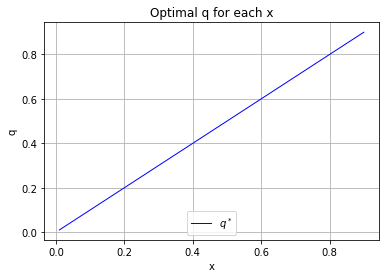

In [56]:
N = 100
x_vec = np.linspace(0.01, 0.9, N)
q_vec = np.empty(N)

for i, x in enumerate(x_vec):
    obj = lambda q : -ins_exp_util(p, q, y, x)
    sol = optimize.minimize_scalar(obj, bounds = (0, x), method = 'Bounded')
    q = sol.x
    q_vec[i] = q

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_vec, q_vec, ls = '-', lw = 1, color = 'blue', label = '$q^*$')
plt.title('Optimal q for each x')

ax.set_xlabel('x')
ax.set_ylabel('q')
ax.grid(True)
ax.legend(loc = 'lower center', frameon = True);

What the graph shows us about the agent's most optimal solutions is that the agent will receive what the agent has lost and that the coverage follows the loss linearly.

# Question 2

Now we look at all the contracts that are acceptable from the agent's point of view, which are all contracts that will provide at least as much as if the agent is not insured, to ensure that the agent gets something out of the deal. We therefore make pi a variable instead of a function.

$$V(q;\tilde{\pi})=pu(y-x+1-\tilde{\pi})+(1-p)u(y-\tilde{\pi})$$
$$V(q;\tilde{\pi})-V_0=0$$
$$$$

In [57]:
def ins_exp_util(pi, p, q, y, x) :
    return p * util(y - x + q - pi) + (1 - p) * util(y - pi)

def V_tilde(pi, p, q, y, x) :
    return ins_exp_util(pi, p, q, y, x) - ins_exp_util(0, p, 0, y, x)

def util(z, theta = -2):
    return (z ** (1 + theta)) / (1 + theta)

y = 1
p = 0.2
theta = -2

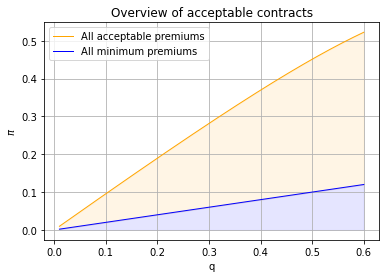

In [59]:
N = 500
q_vec = np.linspace(0.01, 0.6, N)
pi_vec = np.empty(N)
pi_guess = [0.0000001]

for i, q in enumerate(q_vec) :
    obj = lambda pi : V_tilde(pi, p, q, y, x)
    sol = optimize.root(obj, x0 = pi_guess)
    pi = sol.x
    pi_vec[i] = pi

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(q_vec, pi_vec, ls = '-', lw = 1, color = 'orange', label = 'All acceptable premiums')
ax.plot(q_vec, q_vec*p, ls = '-', lw = 1, color = 'blue', label = 'All minimum premiums')

ax.set_xlabel('q')
ax.set_ylabel('$\pi$')
ax.grid(True)
plt.title('Overview of acceptable contracts')
ax.fill_between(q_vec, pi_vec, q_vec*p, alpha = 0.1, color = 'orange')
ax.fill_between(q_vec, q_vec * p, 0, alpha = 0.1, color = 'blue')
ax.legend(loc = 'upper left', frameon = True);

# Question 3

Now we want to look at a setup where the agent's loss is the average of all $x$'s subtracted from a beta distribution. Furthermore, the coverage is fraction of $x$, wich gives us:

$$q=\gamma x,\quad \gamma \in [ 0, 1]$$
$$x\text{ }\sim\text{ Beta}(\alpha, \beta), \quad \alpha=2, \quad \beta=7$$

$$V(\gamma, \pi)=\int^1_0u(y-(1-\gamma)x-\pi)f(x)dx$$

In [50]:
alpha = 2
beta = 7
N = 10000
x = np.random.beta(a = alpha, b = beta, size = N)

def V_mc(z, theta) :
    return util(z, theta)

def MC(x, gamma, pi):
    return np.mean(V_mc(y - (1 - gamma) * x - pi, -2))

mean1 = MC(x, 0.9, 0.2)
mean2 = MC(x, 0.45, 0.1)

print(f'(gamma, pi) = (0.9, 0.2) = {mean1:.10f}')
print(f'(gamma, pi) = (0.45, 0.1) = {mean2:.10f}')

(gamma, pi) = (0.9, 0.2) = -1.2859939287
(gamma, pi) = (0.45, 0.1) = -1.2974014802


From this we can see that situation where $(\gamma, \pi)^1=(0.9, 0.2)$ is the most advantageous, as the agent has maximized the utility the most.

# Question 4

Now we will search for $\pi$ to maximize the firm's profit. We will look a the situation, where agent just barely will choose to get insured, as we look at the firm as a monopolist. 

In [52]:
alpha = 2
beta = 7
N = 10000
x = np.random.beta(a = alpha, b = beta, size = N)

def V_mc(z, theta) :
    return util(z, theta)

def MC(y, x, gamma, pi):
    return np.mean(V_mc(y - (1 - gamma) * x - pi, -2))

def V_maxpi(y, x, gamma, pi) :
    return MC(y, x, gamma, pi) - MC(y, x, 0, 0)

pi_guess = [0.000001]

obj = lambda pi : V_maxpi(y, x, 0.95, pi)
sol = optimize.root(obj, x0 = pi_guess, method = 'broyden1')

print(sol.x[0])

0.23820010768588842


This tells us, that the optimal solution is $\pi = 0.23820010768588842$